In [1]:
import pencil as pc
import numpy as np 
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict
import matplotlib.colors
from tqdm import tqdm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.ndimage.filters import gaussian_filter
import time
import math
from matplotlib import cm
from IPython.display import clear_output
# ## plot parameters
mnras_column_size = 3.32153
mnras_text_size = 6.97522
golden_ratio = (1+np.sqrt(5))/2
plt.rc( ('axes'),labelsize=8)
plt.rc( ('xtick','ytick'),labelsize=7,direction ='in') 
plt.rc('xtick',top=True)
plt.rc('ytick',right=True) # ticks on both sides of the plots
plt.rc(("legend"),fontsize=7,frameon=False)
plt.rc(("figure"),dpi=300, 
       figsize=(mnras_column_size,mnras_column_size/golden_ratio))
matplotlib.rcParams.update({'font.size':7})
matplotlib.rcParams['lines.linewidth'] = 1 
border_width = 1
matplotlib.rcParams['ytick.major.width'] = border_width
matplotlib.rcParams['ytick.minor.width'] = border_width*0.8
matplotlib.rcParams['xtick.major.width'] = border_width
matplotlib.rcParams['xtick.minor.width'] = border_width*0.8
matplotlib.rcParams['axes.linewidth'] = border_width 
plt.rcParams.update({'font.size': 7})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['text.usetex'] = False
print('loaded')

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


/usr/local/lib/python3.10/dist-packages/matplotlib-3.9.1-py3.10-linux-x86_64.egg/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


$ conda install -c plotly plotly-orca psutil requests
loaded


/tmp/ipykernel_10626/251126038.py:13: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
cd ~/SN_turb_radii/cr1s1

/home/yasin/SN_turb_radii/cr1s1


/home/yasin/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/yasin/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
par=pc.read.param(datadir='data')
gd=pc.read.grid(trim=True,datadir='data')

In [4]:
4.5

4.5

In [5]:
30*0.3

9.0

In [291]:

#### Kitchen sink model ####

import time
start = time.time()

############################### Switches #######################################################

alpha2 = True
quenching = True
total_q = False #quench each component by the total field not just the each components individual field strength

dipole = False

bouyancy = True

rotation = True

shear = True

ak_am = False

############################### Parameters and Initial Condidtions #####################################

z0=1.5
z=np.linspace(-z0,z0,192)#192)
dz=z[1]-z[0]

eta = 0.4#0.25
nu  = 0.3#0.25#0.3
ha = 0.4; a0 = 4.75#4.75#5# 0.75#1.5
Ra = ha*a0/eta
cs0 = 15 ; B00 = 1.9#1.90#1.75#5

S=0 ; C = 0 ; omega = 0 ; Ux = 1 ; Uy = 1

if shear == True:
    S = 27#25
if bouyancy == True:
    C1 = 6.5#6.#5.5#7.5
    C2 = 1.5#1.5#2.5#0.75
    C3 = 1.25#1.5#0.1#0.01
if rotation == True:
    omega = 23

Bx=-(z0**2-(z)**2)*5e-4
By=-(z0**2-(z)**2)*5e-4
Bz=0*z#(z0**2-(z)**2)*3e-4
Ux=np.zeros(z.shape)
Uy=np.zeros(z.shape)
Uz=np.zeros(z.shape)

#vaccum boundary conditions

Bx[0] = 0 ; Bx[int(z.shape[0]/2)] = 0 ; Bx[int(z.shape[0])-1] = 0
By[0] = 0 ; By[int(z.shape[0]/2)] = 0 ; By[int(z.shape[0])-1] = 0
Ux[0] = 0 ; Ux[int(z.shape[0])-1] = 0
Uy[0] = 0 ; Uy[int(z.shape[0])-1] = 0
Uz[0] = 0 ; Uz[int(z.shape[0])-1] = 0

######################################## Density and Gravity ########################################

# rho=np.exp(-(z/(2*0.2))**2)
# var=pc.read.var(var_file=f'VAR100.h5',datadir='h_alpha_0.2/Ra_10/data/',magic=['ecr','bb','rho'],trimall=True)
# rho = np.interp(z,np.linspace(-z0,z0,192),avg_xy(var.rho))
# rho=rho_0*np.exp((a1*(z1-np.sqrt(z1**2+z**2)-a2*(z**2)/(2*a1*z2)))/(15)**2)

a1=4.4e-9/par.unit_velocity*par.unit_time
a2=1.7e-9/par.unit_velocity*par.unit_time
z1=1*6.172e20/par.unit_length
z2=1*3.086e+21/par.unit_length

rho=np.exp((a1*(z1-np.sqrt(z1**2+z**2)-a2*(z**2)/(2*a1*z2)))/(par.cs0)**2)
gz=-a1*z/np.sqrt(z1**2+z**2)-a2*(z)/z2


######################################## Alpha function ##############################################

alpha=np.zeros(z.size)
if alpha2 == True:
    for i in range(z.size):
        if   (z[i]<-ha/2):
            alpha[i] =  -a0*np.exp(-(((2*z[i]+ha)/ha)**2))#-a0*np.exp(-((2*z[i]+ha)/ha)**2)
        elif (z[i]>ha/2):
            alpha[i] =  a0*np.exp(-(((2*z[i]-ha)/ha)**2))
        else:
            alpha[i] =  (a0*np.sin(np.pi*z[i]/ha))

        # for i in range(z.size):
        #     if   (z[i]<-ha):
        #         alpha[i] =  -a0*np.exp(-((z[i]+3*ha/2)**2))#-a0*np.exp(-((2*z[i]+ha)/ha)**2)
        #     elif (z[i]>ha):
        #         alpha[i] =  -a0*np.exp(-((z[i]-3*ha/2)**2))
        #     else:
        #         alpha[i] =  (a0/2*np.sin(np.pi*z[i]/ha))

######################################## RHS of equations ##############################################

def func_Bx(Bx,By,Bz,alpha,Ux,Uy,Uz,rho):
    return -np.gradient((alpha)*By,dz) + eta*np.gradient(np.gradient(Bx,dz),dz) + C1*np.gradient(Uy*Bz-Uz*Bz,dz)

def func_By(Bx,By,Bz,alpha,Ux,Uy,Uz,rho):
    return  np.gradient((alpha)*Bx,dz) + eta*np.gradient(np.gradient(By,dz),dz) + C2*np.gradient(Uz*Bx-Ux*Bz,dz) + S*(-Bx)

def func_Bz(Bx,By,Bz,alpha,Ux,Uy,Uz,rho):
    # return alpha*By + eta*np.gradient(np.gradient(Bz,dz),dz) - C3*np.gradient(Ux*By-Uy*Bx,dz)
    return alpha*By + eta*np.gradient(np.gradient(Bz,dz),dz) + C3*np.gradient(Ux*By-Uy*Bx,dz)

def func_Ux(Bx,By,Bz,alpha,Ux,Uy,Uz,rho):
    # return -np.gradient(np.gradient(Bx,dz),dz) + 2*Uy*omega + nu*np.gradient(np.gradient(Ux,dz),dz)
    return -Ux*np.gradient(Uz,dz)+Bz*np.gradient(Bx,dz) + 2*Uy*omega + nu*np.gradient(np.gradient(Ux,dz),dz)

def func_Uy(Bx,By,Bz,alpha,Ux,Uy,Uz,rho):
    # return -np.gradient(np.gradient(By,dz),dz) - 2*Ux*omega + nu*np.grad~ient(np.gradient(Uy,dz),dz)
    return -Uy*np.gradient(Uz,dz)-Bz*np.gradient(By,dz) - 2*Ux*omega + nu*np.gradient(np.gradient(Uy,dz),dz) -S*Ux

def func_Uz(Bx,By,Bz,alpha,Ux,Uy,Uz,rho):
    B_tot=np.sqrt(Bx**2+By**2+Bz**2)
    B_mean=np.mean(np.mean(np.sqrt(Bx**2+By**2+Bz**2)))
    b=B_tot-B_mean
    return -Uz*np.gradient(Uz,dz) + Bx*np.gradient(Bx,dz) + By*np.gradient(By,dz)  + nu*np.gradient(np.gradient(Uz,dz),dz) - (np.gradient(B_tot**2/(8*np.pi),dz)/np.mean(rho)) + (b**2)*gz/(8*np.pi*20000*0.74*np.mean(rho))

######################################## Time parameters ###########################################

t0=0 ;tn=2#3.0

# n=10000
# dt=(tn-t0)/n

dt=0.001
n=int((tn-t0)/dt)

######################################## Time stepping #############################################

Bxt=np.zeros(np.shape([Bx])) ; Byt=np.zeros(np.shape([Bx])) ; Bzt=np.zeros(np.shape([Bx])) ; uzt=np.zeros(np.shape([Uz])) ; rhot=np.zeros(np.shape([rho]))
alphaxt=np.zeros(np.shape([Bx])); alphayt=np.zeros(np.shape([Bx]))

for t in range(0,n):

    # if np.mod(t,10)==0:
        # var=pc.read.var(var_file=f'VAR{t}.h5',datadir='h_alpha_0.2/Ra_10/data/',magic=['ecr','bb','rho'],trimall=True)
        # Uz=uzt[t]#np.interp(z,np.linspace(-z0,z0,192),avg_xy(var.uz))

    B=(np.sqrt(Bx**2+By**2+Bz**2))
    # if np.mean(Uz**2)!=0 and np.mean(B)>0.1:
        # B0=np.sqrt(rho*np.mean(Uz**2))

    if quenching == True:
        B0=np.sqrt(B00)
        alpha_qx=(alpha)/(1+np.divide(B,B0)**2)
        alpha_qy=(alpha)/(1+np.divide(B,B0)**2)
        alpha_q =(alpha)/(1+np.divide(B,B0)**2)

    k1_Bx = dt*func_Bx(Bx,By,Bz,alpha_qx,Ux,Uy,Uz,rho)
    k1_By = dt*func_By(Bx,By,Bz,alpha_qy,Ux,Uy,Uz,rho)
    k1_Bz = dt*func_Bz(Bx,By,Bz,alpha_q,Ux,Uy,Uz,rho)
    k1_Ux = dt*func_Ux(Bx,By,Bz,alpha_q,Ux,Uy,Uz,rho)
    k1_Uy = dt*func_Uy(Bx,By,Bz,alpha_q,Ux,Uy,Uz,rho)
    k1_Uz = dt*func_Uz(Bx,By,Bz,alpha_q,Ux,Uy,Uz,rho)

    k2_Bx = dt*func_Bx(Bx+k1_Bx,By+k1_By,Bz+k1_Bz,alpha_qx,Ux+k1_Ux,Uy+k1_Uy,Uz+k1_Uz,rho)
    k2_By = dt*func_By(Bx+k1_Bx,By+k1_By,Bz+k1_Bz,alpha_qy,Ux+k1_Ux,Uy+k1_Uy,Uz+k1_Uz,rho)
    k2_Bz = dt*func_Bz(Bx+k1_Bx,By+k1_By,Bz+k1_Bz,alpha_q,Ux+k1_Ux,Uy+k1_Uy,Uz+k1_Uz,rho)
    k2_Ux = dt*func_Ux(Bx+k1_Bx,By+k1_By,Bz+k1_Bz,alpha_q,Ux+k1_Ux,Uy+k1_Uy,Uz+k1_Uz,rho)
    k2_Uy = dt*func_Uy(Bx+k1_Bx,By+k1_By,Bz+k1_Bz,alpha_q,Ux+k1_Ux,Uy+k1_Uy,Uz+k1_Uz,rho)
    k2_Uz = dt*func_Uz(Bx+k1_Bx,By+k1_By,Bz+k1_Bz,alpha_q,Ux+k1_Ux,Uy+k1_Uy,Uz+k1_Uz,rho)

    Bx += (k1_Bx+k2_Bx)/2
    By += (k1_By+k2_By)/2
    Bz += (k1_Bz+k2_Bz)/2
    # if bouyancy == True:
    Ux += (k1_Ux+k2_Ux)/2
    Uy += (k1_Uy+k2_Uy)/2
    Uz += (k1_Uz+k2_Uz)/2
        # Ux =  Uz
        # Uy =  1.2*Uz

    #Boundary conditions
    Ux[:5]  = Ux[5]   #gaussian_filter(Uz[:5],sigma=1.5)
    Ux[-5:] = Ux[-5]  #gaussian_filter(Uz[-5:],sigma=1.5)

    Uy[:5]  = Uy[5]   #gaussian_filter(Uz[:5],sigma=1.5)
    Uy[-5:] = Uy[-5]  #gaussian_filter(Uz[-5:],sigma=1.5)

    Uz[:5]  = Uz[5]   #gaussian_filter(Uz[:5],sigma=1.5)
    Uz[-5:] = Uz[-5]  #gaussian_filter(Uz[-5:],sigma=1.5)

    Bx[:5]  = Bx[5]   #gaussian_filter(Bx[:5],sigma=1.5)
    Bx[-5:] = Bx[-5]  #gaussian_filter(Bx[-5:],sigma=1.5)

    By[:5]  = By[5]   #gaussian_filter(By[:5],sigma=1.5)
    By[-5:] = By[-5]  #gaussian_filter(By[-5:],sigma=1.5)

    Bz[:5]  = Bz[5]   #gaussian_filter(By[:5],sigma=1.5)
    Bz[-5:] = Bz[-5]  #gaussian_filter(By[-5:],sigma=1.5)

    if dipole == True:
        zmid=z.shape[0]/2
        zdis=1
        By[int(zmid-zdis):int(zmid+zdis)]  = 0
        Bx[int(zmid-zdis):int(zmid+zdis)]  = 0

    ################### Outputs #######################

    Bxt=np.concatenate([Bxt,np.array([Bx])],axis=0)
    Byt=np.concatenate([Byt,np.array([By])],axis=0)
    Bzt=np.concatenate([Bzt,np.array([Bz])],axis=0)
    uzt=np.concatenate([uzt,np.array([Uz])],axis=0)
    rhot=np.concatenate([rhot,np.array([rho])],axis=0)
    alphaxt=np.concatenate([alphaxt,np.array([alpha_qx])],axis=0)
    alphayt=np.concatenate([alphayt,np.array([alpha_qy])],axis=0)

    ################# Error Check #####################
    if math.isnan(Uz[int(z.shape[0]/2)])==True :
        print('NaN in Uz')
        break
    if math.isnan(Bx[int(z.shape[0]/2)])==True :
        print('NaN in Bx')
        break
    if math.isnan(By[int(z.shape[0]/2)])==True :
        print('NaN in By')
        break
    if math.isnan(Bz[int(z.shape[0]/2)])==True :
        print('NaN in Bz')
        break

    # if t*dt>0.5:
    #     for i in range(len(Uz)):
    #         if (np.abs(np.gradient(np.gradient(Uz,dz),dz))[i]>0.5 and np.abs(z[i])>0.1) :
    #             Uz[i-3:i+3]=gaussian_filter(Uz[i-3:i+3],sigma=1.0)

    # Va=B/np.sqrt(par.mu0*rho)

    # Uz=C*(z/(np.abs(z)*par.cs0))*(Va**2) # (14) in  K.L.L & V.V.P with the z/|z|

    # Uz=C*(ha/par.cs0)*np.gradient((Va**2),dz) # (14) in  K.L.L & V.V.P with the z/|z|

    clear_output(wait=True)
    print(r'Precentage complete = {:.3f}%'.format(t/(n-1)*100))
    print(r't={:.3f}'.format(t*dt))
    print(r'Bx_max={:.3f}'.format(Bx.max()))
    print('By_max={:.3f}'.format(By.max()))
    print('Bz_max={:.3f}'.format(Bz.max()))
    print('Uz_max={:.3f}'.format(Uz.max()))

end = time.time()
print('Final time = ',t*dt)
print('dt = ',dt)
print('dz = ',dz)
print('Time elapsed = ',(end - start))


Precentage complete = 84.392%
t=1.687
Bx_max=3066576829018750283648978813631917957708590723520523756142896509229932256291498940151717056433070416557998103416190685622991533148355017545089024.000
By_max=15866601695374628693228548566518516889673856479362910010692874720080306890509233297699336038273113113533119454900253675584578897408716550751387648.000
Bz_max=111968286133096230398750881545783982939073753803066191117178585357294178263241781211080534695354115847641992474736183000414535903458299167637504.000
Uz_max=5889976057531990053492365073884811391678254533896401715248202931481036821218519844985283792243385023557778546379593942711449809722603416364224578846720.000
NaN in Uz
Final time =  1.688
dt =  0.001
dz =  0.015706806282722585
Time elapsed =  5.794999599456787


/tmp/ipykernel_10626/831026769.py:99: RuntimeWarning: overflow encountered in multiply
  return -np.gradient((alpha)*By,dz) + eta*np.gradient(np.gradient(Bx,dz),dz) + C1*np.gradient(Uy*Bz-Uz*Bz,dz)
/tmp/ipykernel_10626/831026769.py:99: RuntimeWarning: invalid value encountered in subtract
  return -np.gradient((alpha)*By,dz) + eta*np.gradient(np.gradient(Bx,dz),dz) + C1*np.gradient(Uy*Bz-Uz*Bz,dz)
/tmp/ipykernel_10626/831026769.py:102: RuntimeWarning: overflow encountered in multiply
  return  np.gradient((alpha)*Bx,dz) + eta*np.gradient(np.gradient(By,dz),dz) + C2*np.gradient(Uz*Bx-Ux*Bz,dz) + S*(-Bx)
/tmp/ipykernel_10626/831026769.py:102: RuntimeWarning: invalid value encountered in subtract
  return  np.gradient((alpha)*Bx,dz) + eta*np.gradient(np.gradient(By,dz),dz) + C2*np.gradient(Uz*Bx-Ux*Bz,dz) + S*(-Bx)
/tmp/ipykernel_10626/831026769.py:106: RuntimeWarning: overflow encountered in multiply
  return alpha*By + eta*np.gradient(np.gradient(Bz,dz),dz) + C3*np.gradient(Ux*By-Uy*Bx,

In [292]:
0.4*4.75

1.9000000000000001

In [293]:
0.3*6.35

1.9049999999999998

In [294]:
Bxt_norm=np.copy(Bxt)
for i in range(len(Bxt[:,0])):
    Bxt_norm[i]=Bxt[i,:]/(Bxt[i,:].max())

Byt_norm=np.copy(Byt)
for i in range(len(Byt[:,0])):
    Byt_norm[i]=Byt[i,:]/(Byt[i,:].max())

# Bzt_norm=np.copy(Bzt)
# for i in range(len(Bzt[:,0])):
#     Bzt_norm[i]=Bzt[i,:]/(Bzt[i,:].max())

# Uzt_norm=np.copy(uzt)
# for i in range(len(uzt[:,0])):
#     Uzt_norm[i]=uzt[i,:]/(uzt[i,:].max())

Z=z
Z1=z
t0=np.linspace(0,1.525,t+2)
t1=np.linspace(0,1.4,t+2)
# t0=np.linspace(0,t*dt,Byt.shape[0])
Z,T=np.meshgrid(t0,Z)
Z1,T1=np.meshgrid(t1,Z1)

/tmp/ipykernel_10626/4145678202.py:3: RuntimeWarning: invalid value encountered in divide
  Bxt_norm[i]=Bxt[i,:]/(Bxt[i,:].max())
/tmp/ipykernel_10626/4145678202.py:7: RuntimeWarning: invalid value encountered in divide
  Byt_norm[i]=Byt[i,:]/(Byt[i,:].max())


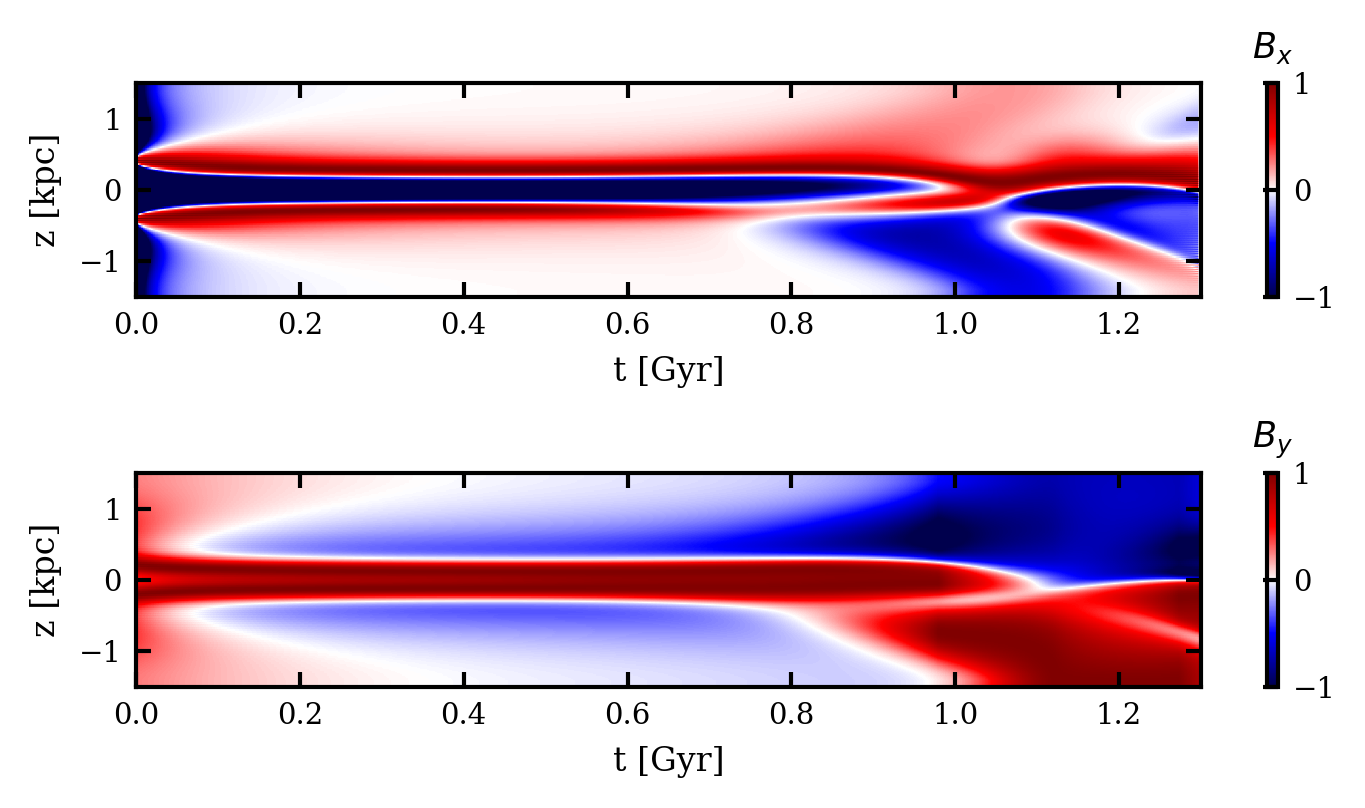

In [295]:
plt.figure(figsize=(5,5))
plt.subplot(411)
plt.pcolormesh(Z1,T1,np.roll(Bxt_norm,-120,axis=0).T,cmap=cm.seismic,vmin=-1,vmax=1,shading='auto')
# plt.pcolormesh(Z1,T1,np.roll(Bxt_norm,0,axis=0).T,cmap=cm.seismic,vmin=-1,vmax=1,shading='auto')
plt.xlim([0,1.3])
plt.ylabel('z [kpc]')
plt.xlabel('t [Gyr]')
clb=plt.colorbar()
clb.ax.set_title('$B_x$')
plt.subplot(412)
plt.pcolormesh(Z,T,np.roll(Byt_norm.T,-175,axis=1),cmap=cm.seismic,vmin=-1,vmax=1,shading='auto')
# plt.pcolormesh(Z,T,np.roll(Byt_norm.T,0,axis=1),cmap=cm.seismic,vmin=-1,vmax=1,shading='auto')
plt.xlim([0,1.3])
plt.xlabel('t [Gyr]')
plt.ylabel('z [kpc]')
clb=plt.colorbar()
clb.ax.set_title('$B_y$')
# plt.subplot(413)
# plt.pcolormesh(Z,T,Bzt_norm.T,cmap=cm.seismic,vmin=-1,vmax=1,shading='auto')
# plt.xlabel('t [Gyr]')
# plt.ylabel('z [kpc]')
# clb=plt.colorbar()
# clb.ax.set_title('$B_z$')
# plt.subplot(414)
# plt.pcolormesh(Z,T,Uzt_norm.T,cmap=cm.seismic,vmin=-1,vmax=1,shading='auto')
# plt.xlabel('t [Gyr]')
# plt.ylabel('z [kpc]')
# clb=plt.colorbar()
# clb.ax.set_title('$U_z$')
# plt.suptitle('No bouyancy and no shear (Quadrupole)')
plt.tight_layout()

In [6]:
par=pc.read.param()

In [7]:
par.unit_length

3.08567758e+21

In [8]:
g_B_cgs=6.172e20
g_D_cgs=3.086e21
g_E_cgs=6.7892e20
g_F_cgs=1.512e22
g_B=0 
g_D=0; g_B_factor=1.0; g_D_factor=1.0; g_E_factor=1.0; g_F_factor=1.0
g_A_cgs=4.4e-9; g_C_cgs=1.7e-9; Rsol_cgs=2.6231e22
g_A=0; g_C=0; g_A_factor=1.0; g_C_factor=1.0
g_E=0; g_F=0; Rgal=0; Rsol=0

In [9]:
unit_length=par.unit_length
unit_velocity=par.unit_velocity
unit_time=par.unit_time
z=np.linspace(-1.5,1.5,192)
Omega=50
Sshear=-Omega

In [10]:
g_A = g_A_factor*g_A_cgs/unit_velocity*unit_time
g_B = g_B_factor*g_B_cgs/unit_length
g_C = g_C_factor*g_C_cgs/unit_velocity*unit_time
g_D = g_D_factor*g_D_cgs/unit_length
g_E = g_E_factor*g_E_cgs/unit_length
g_F = g_F_factor*g_F_cgs/unit_length
        # if (Rsol==impossible) 
Rsol=Rsol_cgs/unit_length
        # if (Rgal==impossible) 
Rgal=Rsol_cgs/unit_length
#       else if (unit_system=='SI') then
# !        call not_implemented('initialize_gravity','SI unit conversions')
#         g_A = g_A_factor*g_A_cgs/unit_velocity*unit_time/1e2
#         g_B = g_B_factor*g_B_cgs/unit_length/1e2
#         g_C = g_C_factor*g_C_cgs/unit_velocity*unit_time/1e2
#         g_D = g_D_factor*g_D_cgs/unit_length/1e2
#         g_E = g_E_factor*g_E_cgs/unit_length/1e2
#         g_F = g_F_factor*g_F_cgs/unit_length/1e2
#         if (Rsol==impossible) Rsol=Rsol_cgs/unit_length/1e2
#         if (Rgal==impossible) Rgal=Rsol_cgs/unit_length/1e2
#       endif

# !  Gravity profile from K. Ferriere, ApJ 497, 759, 1998, eq (36)
# !  at various radius relative to the solar radius.  (for interstellar runs)
# !  Rsol and Rgal are by default 8.5 kpc

gravz_zpencil = -(g_A*z/np.sqrt(z**2+g_B**2)*np.exp((Rsol-Rgal)/g_F) + g_C*z/g_D*(Rsol**2+g_E**2)/(Rgal**2+g_E**2)-2*Omega*(Omega+Sshear)*z)

In [11]:
Rgal=Rsol
Omega=30
gravz_zpencil = -(g_A*z/np.sqrt(z**2+g_B**2)*np.exp((Rsol-Rgal)/g_F) + g_C*z/g_D*(Rsol**2+g_E**2)/(Rgal**2+g_E**2)-2*Omega*(Omega+Sshear)*z)
rho=0.12*np.exp((g_A*(g_B-np.sqrt(g_B**2+z**2)*np.exp((Rsol-Rgal)/g_F)) + g_C/g_D*z**2/2*(Rsol**2+g_E**2)/(Rgal**2+g_E**2) - Omega*(Omega+Sshear)*z**2)/par.cs0**2)

In [12]:
H=81*(Rgal/Rsol)**(-0.58)
rho=0.58*np.exp( ( (Rgal-4.5)**2 - (Rsol-4.5)**2 )/2.9**2)*(Rgal/Rsol)**(-0.58)*np.exp(-(z/H)**2)

In [13]:
H1=0.127; H2=0.318; H3=0.403
rho=0.226*(0.456*np.exp(-(z/H1)**2) + 0.403*np.exp(-(z/H2)**2) + 0.141*np.exp(-(np.abs(z)/H3)**2))

In [14]:
rho.mean()

np.float64(0.03226280281952915)

In [15]:
Rgal=4.5#8.5
Omega=30
Hr=1.5
if 3.5<Rgal<Rsol:
    a=1
else:
    a=Rgal/Rsol
H1=0.127/a
H2=0.318/a
H3=0.403/a
nc=0.340/a**2*(0.859*np.exp(-(z/H1)**2)
              +0.047*np.exp(-(z/H2)**2)
              +0.094*np.exp(-np.abs(z)/H3))

nw=0.226/a*((1.745-1.289/a)*np.exp(-(z/H1)**2)+
            (0.473-0.070/a)*np.exp(-(z/H2)**2)+
            (0.283-0.142/a)*np.exp(-(np.abs(z)/H3)))

ni=(0.0237*np.exp(-(Rgal**2-Rsol**2)/(37)**2)**np.exp(-np.abs(z)/1)
  +0.0013*np.exp(-((Rgal-4)**2-(Rsol-4)**2)/(2)**2)*np.exp(-np.abs(z)/0.150))

nh=4.8e-4*(0.12*np.exp(-(Rgal-Rsol)/4.9)
          +0.88*np.exp(((Rgal-4)**2-(Rsol-4)**2)/(2)**2))*np.exp(-np.abs(z)/Hr)*(Rgal/Rsol)**(-1.65)

In [16]:
Ni=(1.46e20*np.exp(-(Rgal**2-Rsol**2)/(37)**2)
   +1.20e18*np.exp(-((Rgal-4.5)**2-(Rsol-4.5)**2)/(2)**2))
                  
Nh=4.4e18*(0.12*np.exp(-(Rgal-Rsol)/4.9)+0.88*np.exp(((Rgal-4.5)**2-(Rsol-4.5)**2)/(2.9)**2))

In [17]:
n=(nc+nw+ni+nh)

In [18]:
mid=96; z_range=80#65

In [19]:
z[mid+z_range]

np.float64(1.264397905759162)

In [20]:
par.total_mass

0.11195817619913272

In [21]:
n[mid-z_range:mid+z_range].mean()

np.float64(0.12650436879281335)

In [22]:
n.mean()

np.float64(0.10978730228383178)

In [23]:
He_factor=1.101
m_u_cgs=1.66053886e-24
rho = n * m_u_cgs/par.unit_density*He_factor

In [24]:
rho[mid-z_range:mid+z_range].mean()

np.float64(0.1381841229905594)

In [25]:
19/11*par.total_mass

0.1933823043439565

In [26]:
28/11*par.total_mass

0.28498444850688326

In [27]:
8.5/11*par.total_mass

0.08651313615387528

In [28]:
par.total_mass

0.11195817619913272

In [29]:
R=np.linspace(0,20,100)

In [30]:
SNI=2.6*np.exp(-(R-Rsol)/4.9)
SNII=19*np.exp(-((R-4.5)**2-(Rsol-4.5)**2)/((2.9)**2))

Text(0, 0.5, '$\\sigma$ [kpc$^{-2}$Myr$^{-1}$]')

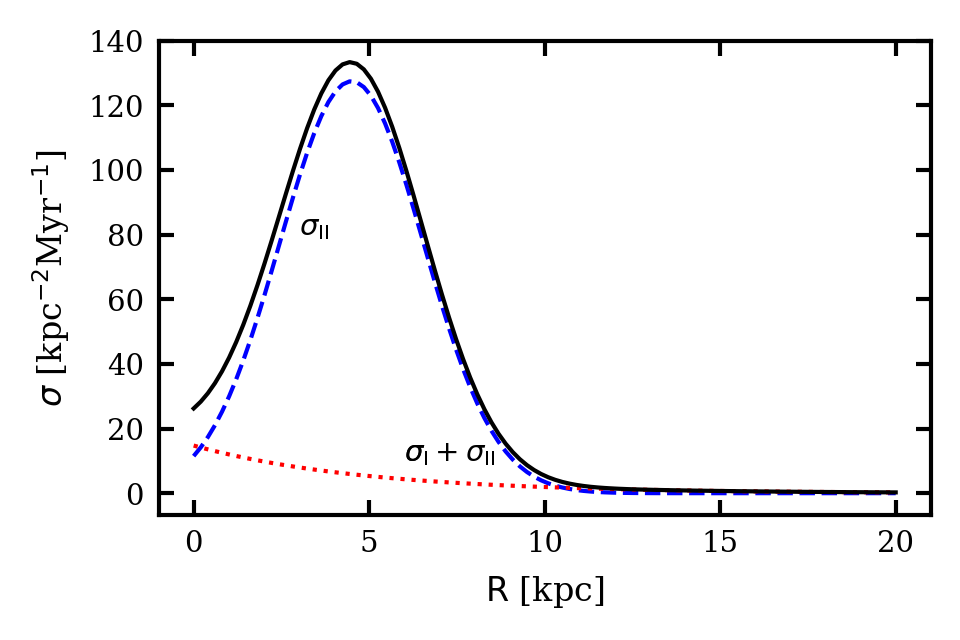

In [66]:
plt.plot(R,SNII,color='blue',ls='--')
plt.plot(R,SNI,ls=':',color='red')
plt.plot(R,SNII+SNI,color='k')
plt.text(3,80,r'$\sigma_{\rm{II}}$')
plt.text(6,10,r'$\sigma_{\rm{I}}$')
plt.text(6,10,r'$\sigma_{\rm{I}} + \sigma_{\rm{II}}$')
plt.xlabel(r'$\rm{R}$ [kpc]')
plt.ylabel(r'$\sigma$ [kpc$^{-2}$Myr$^{-1}$]')
